In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import os

data = np.load('aggregated_data_2d-wca.npz')
phis = data['phi']
true_phis = data['true_phi']
temperatures = data['temperature']
taus = data['tau']
ts = data['t']
isfs = data['isf']

softness = 1 / temperatures
cmap = plt.cm.viridis
norm = LogNorm(softness.min(), softness.max())

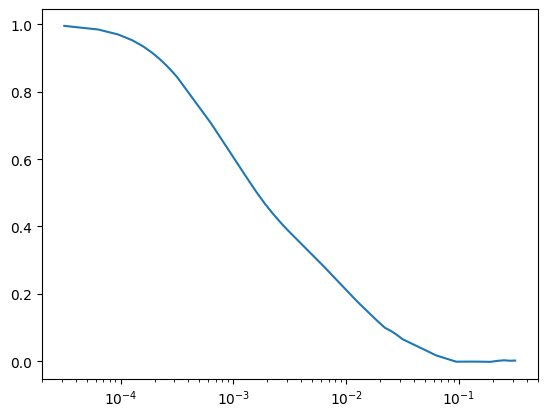

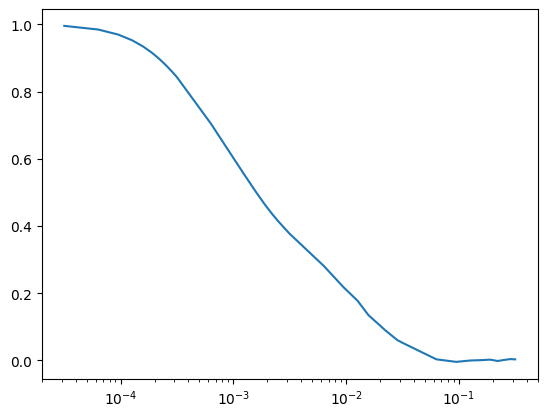

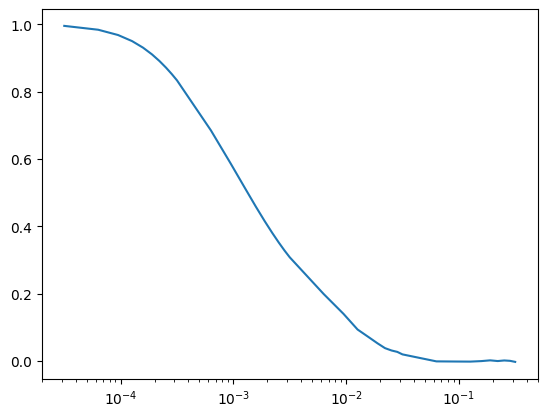

In [4]:
for t, isf in zip(ts, isfs):
    plt.plot(t, isf)
    plt.xscale('log')
    plt.show()

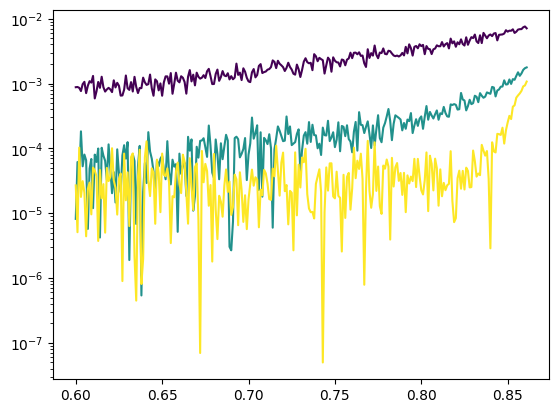

In [41]:
for s in np.unique(softness):
    mask = softness == s
    x = phis[mask]
    y = true_phis[mask][np.argsort(x)]
    x = np.sort(x)
    plt.plot(x, abs(x - y), c=cmap(norm(s)))
plt.yscale('log')

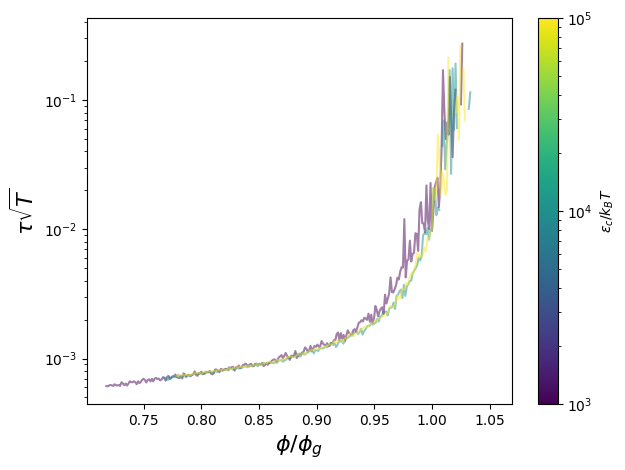

In [50]:
g = 1e-2

for s in np.unique(softness):
    mask = softness == s
    x = phis[mask]
    xp = true_phis[mask][np.argsort(x)]
    y = taus[mask][np.argsort(x)]
    x = np.sort(x)
    ig = np.argwhere(y < g)[-1][0]
    plt.plot(x / x[ig], y, c=cmap(norm(s)), alpha=0.5, zorder=0)
    # plt.plot(xp / xp[ig], y, c=cmap(norm(s)))
plt.yscale('log')

sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(np.unique(softness))
cbar = plt.colorbar(sm, ax=plt.gca(), label=r'$\varepsilon_c / k_B T$')

plt.xlabel(r'$\phi / \phi_g$', fontsize=16)
plt.ylabel(r'$\tau \sqrt{T}$', fontsize=16)
plt.tight_layout()
plt.savefig('isf_normalized_2.png', dpi=600)

Array(0.70800053, dtype=float64)

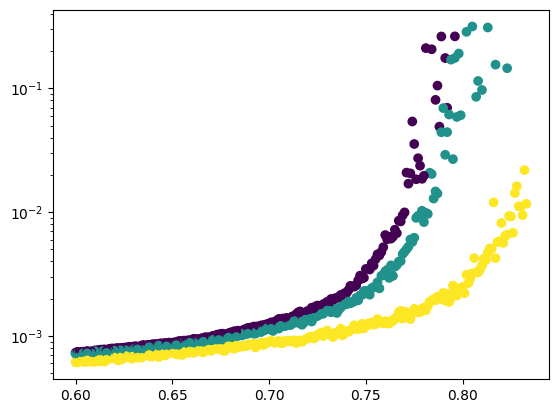

In [15]:
cm = plt.cm.viridis
t_norm = LogNorm(temperatures_hist.min(), temperatures_hist.max())
plt.scatter(phis_hist, taus_hist, c=cm(t_norm(temperatures_hist)))
plt.yscale('log')

In [16]:
from matplotlib.colors import LogNorm

softness = 1 / temperatures_hist

cmap = plt.cm.viridis
norm = LogNorm(min(softness), max(softness))

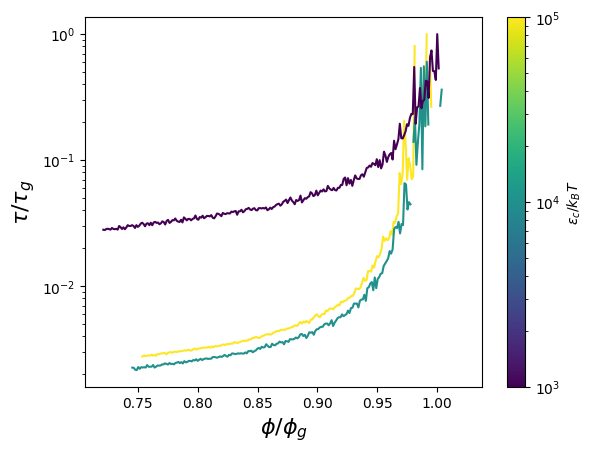

In [19]:
for temp in np.unique(temperatures_hist):
    mask = temperatures_hist == temp
    x = phis_hist[mask]
    y = taus_hist[mask]
    y[np.isnan(y)] = -np.inf
    y = y[np.argsort(x)]
    x = x[np.argsort(x)]


    x_g = x[np.argmax(y)]
    y_g = y[np.argmax(y)]
    x = x / x_g
    y = y / y_g
    y[y == -np.inf] = np.nan
    plt.plot(x, y, c=cmap(norm(softness[mask][0])))


    # phi = x
    # tau = y
    # m = np.isfinite(phi) & np.isfinite(tau) & (tau > 0)
    # phi, tau = phi[m], tau[m]
    # # sort by phi
    # order = np.argsort(phi)
    # phi, tau = phi[order], tau[order]
    # # choose a reference "glass" time (set this to what you want)
    # tau_g = 5e-1  # example
    # logtau = np.log10(tau)
    # logtau_g = np.log10(tau_g)
    # # find a crossing of tau_g
    # i = np.where((logtau[:-1] - logtau_g) * (logtau[1:] - logtau_g) <= 0)[0]
    # if len(i) == 0:
    #     raise ValueError("tau_g not bracketed by your data; pick a tau_g within the range of tau.")
    # i = i[0]
    # # interpolate phi_g at tau=tau_g (linear in log10(tau))
    # phi_g = np.interp(logtau_g, [logtau[i], logtau[i+1]], [phi[i], phi[i+1]])
    # x = phi / phi_g
    # y = np.log10(tau / tau_g)
    # plt.plot(x, y, "o-")

plt.yscale('log')

plt.xlabel(r'$\phi / \phi_g$', fontsize=16)
plt.ylabel(r'$\tau / \tau_g$', fontsize=16)

sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(np.unique(softness))
cbar = plt.colorbar(sm, ax=plt.gca(), label=r'$\varepsilon_c / k_B T$')


0.001


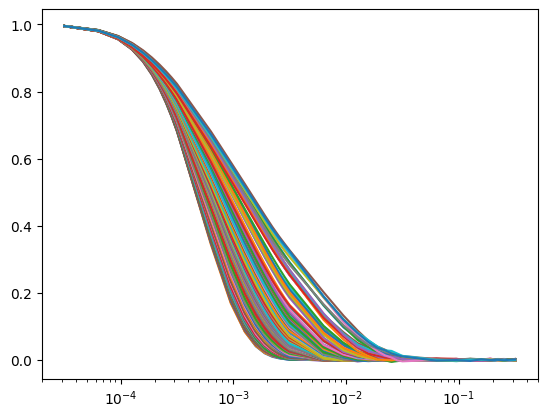

In [54]:
for temp in np.unique(temperatures_hist)[::-1]:
    mask = temperatures_hist == temp
    order = np.argsort(phis_hist[mask])

    # x = phis_hist[mask]
    # y = taus_hist[mask]
    # y[np.isnan(y)] = -np.inf
    # y = y[np.argsort(x)]
    # x = x[np.argsort(x)]
    print(temp)
    break

# g(t)~exp(-t/tau)^\beta # final decay
# \tau~exp(A \phi / (\phi_0 - \phi))
# \tau~exp(C \phi)

c = 0
for t, isf in zip(ts_hist[mask][order], isfs_hist[mask][order]):
    plt.plot(t, isf)
    c += 1
    if c > 200:
        break
plt.xscale('log')

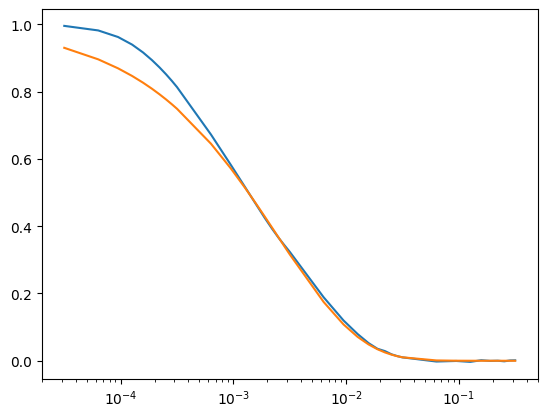

In [73]:
tau = 2.5e-3
beta = 0.6
plt.plot(t, isf)
plt.plot(t, np.exp(-(t / tau) ** beta))
plt.xscale('log')

In [ ]:
y = exp(-(t / T) ^ B)

x = log(t)
t = exp(x)

y = exp()